# Project 4:

### This project includes :
Part 1: Clustering Analysis 

Part 2: Text Mining  

Part 3: Artificial Neural Network(implemented in project 3 notebook)


# Part 1 : Clustering Analysis

## Imports

In [0]:
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster import hierarchy

### Read from File

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mattishii26/DataMiningRepo/master/imdb_dataset.csv')
df.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


### Clean Data



In [0]:
genreRating = df[['title', 'imdb_rating']]
genreRating.dropna()
genreRating.head()

,title,imdb_rating
0,Filly Brown,5.5
1,The Dish,7.3
2,Waiting for Guffman,7.6
3,The Age of Innocence,7.2
4,Malevolence,5.1


## K-means Clustering

In [0]:
data = genreRating.drop('title',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=genreRating.title, columns=['imdb_rating'])

,imdb_rating
title,
Filly Brown,1
The Dish,0
Waiting for Guffman,0
The Age of Innocence,0
Malevolence,1
Old Partner,0
Lady Jane,0
Mad Dog Time,1
Beauty Is Embarrassing,0


In [0]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,imdb_rating
0,7.190464
1,5.464259


### Number of Clusters

Text(0, 0.5, 'SSE')

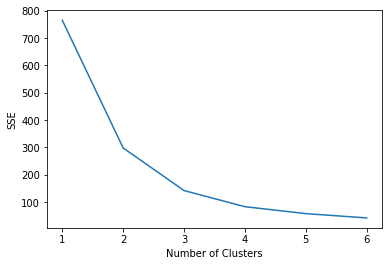

In [0]:
numClusters=[1,2,3,4,5,6]
SSE = []
for k in numClusters:
  k_means = cluster.KMeans(n_clusters=k)
  k_means.fit(data)
  SSE.append(k_means.inertia_)

plt.plot(numClusters,SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

In [0]:
data = df[['title', 'genre','imdb_rating']]

### Single Link

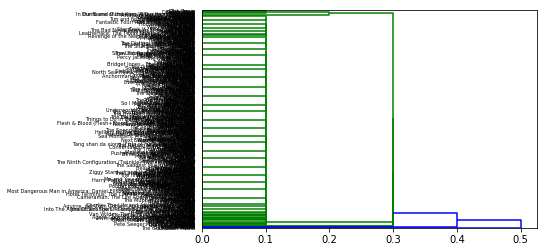

In [0]:
names = data['title']
Y = data['genre']
X = data.drop(['title', 'genre'], axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

### Complete Link

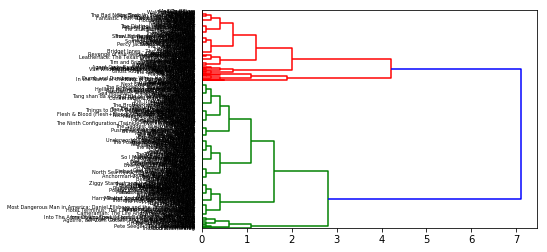

In [0]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

### Group Average

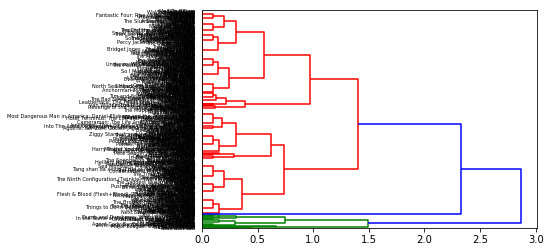

In [0]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

#  Part 2: Text Mining

### Task:
--------
2.3. Your task is to create a count vector and a tfidf vector on the given data (refer to 2. In the resources below).

2.4. Display the count vector and tfidf vector and explain the usage of tfidf. 

------

In [0]:
corpus = ['Now for manners use has company believe parlors.',
            'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
            'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.', 
            'Principle oh explained excellent do my suspected conveying in.',
            'Excellent you did therefore perfectly supposing described. ',
            'Its had resolving otherwise she contented therefore.',
            'Afford relied warmth out sir hearts sister use garden.',
            'Men day warmth formed admire former simple.',
            'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' , 
            'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. '
         ]

### Count Vectorizer
--------

Each string in the "text" matrix is made into a CountVectorizer that will transform each string into its own document. The CountVectorizer will create a matrix that holds each uniuqe word in each document. We then transform that into a matrix that will hold the number of times that word in the CountVector is in each document. 

--------

In [0]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.CountVectorizer(min_df=2)

matrix = vectorizer.fit_transform(corpus)

print("Matrix Type")
print(type(matrix))
print()
print(matrix.toarray())
print()
print(vectorizer.get_feature_names())

Matrix Type
<class 'scipy.sparse.csr.csr_matrix'>

[[0 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0]]

['admire', 'as', 'did', 'excellent', 'formed', 'no', 'on', 'therefore', 'use', 'warmth']


### TfldfVectorizer
---------

Here we try Tfld to give the words equal weights to see more accurately the word occurrences. For this portion we looked for words that appeared at least once in each document. 

-------------

In [0]:
vectorizer = sk_text.TfidfVectorizer(min_df=1)

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))
print(matrix.toarray())
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.36386176 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.         0.         0.36386176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27061472 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.215

**Increasing the minimum amount the word appears yields less results, but shows words that could signify more importance.**

In [0]:
vectorizer = sk_text.TfidfVectorizer(min_df=2)

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))
print(matrix.toarray())
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]